# CLICK STREAM ANALYTICS PROJECT_PART 2

In [36]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import math

In [37]:
hcsdata = pd.read_excel('HotelClickStream.xls')

In [4]:
hcsdata.head()

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,NaN,47.546875,39,1,0,1
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1


In [5]:
hcsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 16 columns):
ID                   3749 non-null int64
DOMAIN_ID            3749 non-null uint64
MACHINE_ID           3749 non-null int64
SITE_SESSION_ID      3749 non-null int64
TRANS_FREQ           3749 non-null int64
DOMAIN_NAME          3749 non-null object
DIRECTP_D            3749 non-null int64
PROD_NAME            3749 non-null object
PROD_QTY             3749 non-null int64
PROD_TOTPRICE        3749 non-null float64
REF_DOMAIN_NAME      1687 non-null object
DURATION             3749 non-null float64
PAGES_VIEWED         3749 non-null int64
HOUSEHOLD_SIZE       3749 non-null int64
CHILDREN_D           3749 non-null int64
CONNECTIONSPEED_D    3749 non-null int64
dtypes: float64(2), int64(10), object(3), uint64(1)
memory usage: 468.8+ KB


In [6]:
hcsdata.describe()

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DIRECTP_D,PROD_QTY,PROD_TOTPRICE,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D
count,3749.000000,3.749000e+03,3.749000e+03,3.749000e+03,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,1877.293678,8.436032e+18,8.615370e+07,1.976820e+13,2.981328,0.481462,1.717258,163.859624,25.317508,18.331288,3.273940,0.603894,0.992265
std,1083.651205,4.548078e+18,6.798597e+06,2.750259e+13,4.120927,0.499723,1.387385,184.484515,22.806497,16.636523,4.388536,0.489152,0.087622
min,1.000000,8.614049e+17,1.764018e+07,3.170357e+12,1.000000,0.000000,0.000000,0.000000,0.029999,1.000000,1.000000,0.000000,0.000000
25%,939.000000,5.078454e+18,8.197324e+07,4.404378e+12,1.000000,0.000000,1.000000,71.950000,9.449219,8.000000,2.000000,0.000000,1.000000
50%,1878.000000,7.317461e+18,8.698025e+07,5.037588e+12,2.000000,0.000000,1.000000,115.990000,17.777344,13.000000,3.000000,1.000000,1.000000
75%,2815.000000,9.530953e+18,9.165384e+07,6.535772e+12,3.000000,1.000000,2.000000,199.980000,33.656250,23.000000,4.000000,1.000000,1.000000
max,3753.000000,1.747520e+19,9.532007e+07,7.441268e+13,30.000000,1.000000,32.000000,2847.039993,227.343750,141.000000,99.000000,1.000000,1.000000


# Adding 2 variables into data 
*  REF_D (create a dummy variable indicating whether the transaction was referenced from other website, if not, the final booking website was directly accessed. If no information provided for the variable REF_DOMAIN_NAME, REF_D = 0; otherwise REF_D = 1) 
*  LOG_PRICE (Log transformation of PROD_TOTPRICE)

In [7]:
hcsdata.loc[pd.isna(hcsdata.REF_DOMAIN_NAME),'REF_D']=0
hcsdata.loc[pd.notna(hcsdata.REF_DOMAIN_NAME),'REF_D']=1

In [8]:
hcsdata.head()

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1,0.0
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1,1.0
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1,1.0
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,NaN,47.546875,39,1,0,1,0.0
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1,1.0


# Taking LOG_PRICE (take the log transformation of the variable PROD_TOTPRICE )

In [9]:
hcsdata.PROD_TOTPRICE.min()

0.0

In [10]:
hcsdata['LOG_PRICE'] = np.log(hcsdata['PROD_TOTPRICE'])

C:\Users\chike\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
hcsdata['LOG_PRICE']=np.log1p(hcsdata.PROD_TOTPRICE)

In [12]:
hcsdata.head()

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D,LOG_PRICE
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1,0.0,7.954386
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1,1.0,7.786527
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1,1.0,7.682022
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,NaN,47.546875,39,1,0,1,0.0,7.580547
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1,1.0,7.494430


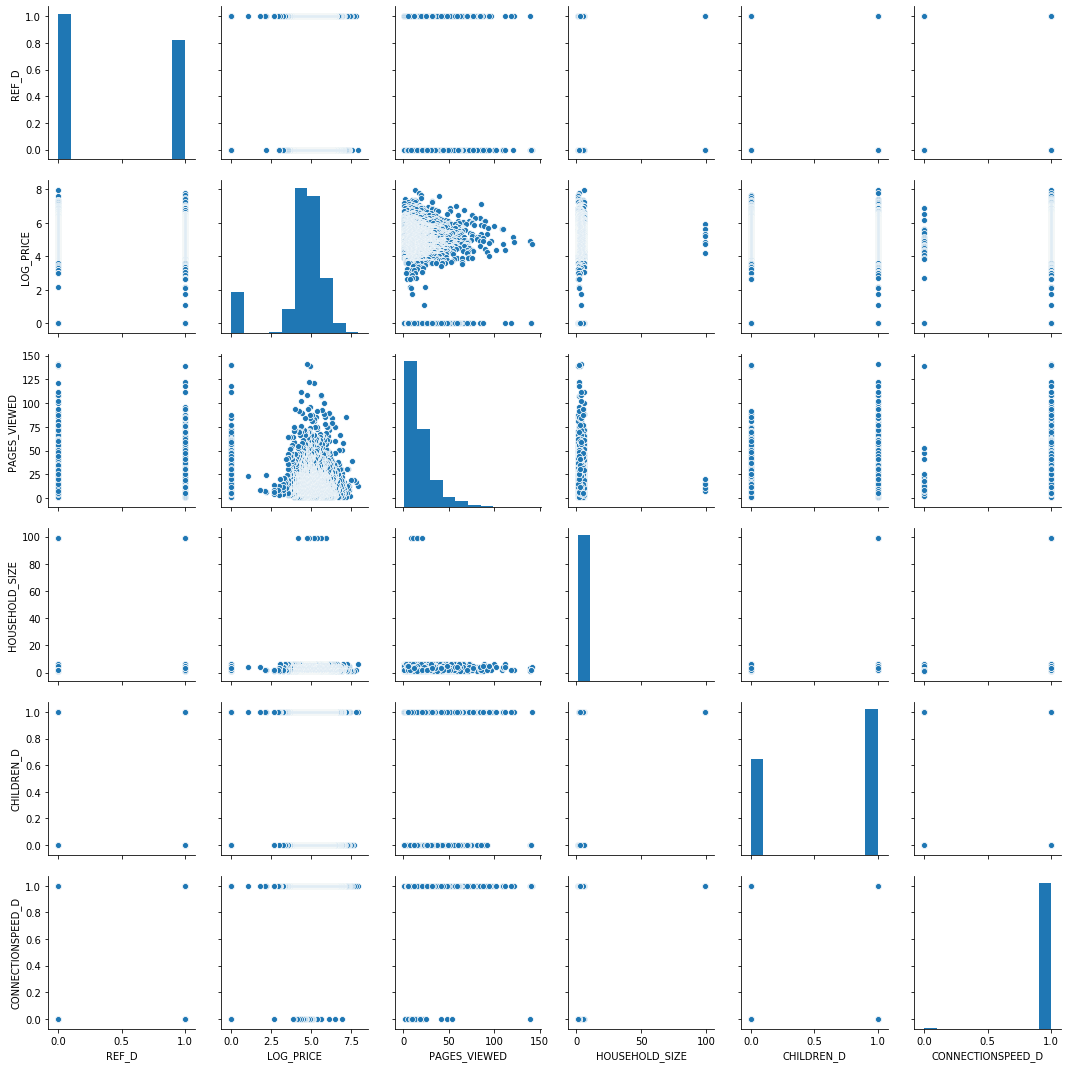

In [13]:
sns.pairplot(hcsdata,vars=['REF_D','LOG_PRICE','PAGES_VIEWED','HOUSEHOLD_SIZE','CHILDREN_D','CONNECTIONSPEED_D'])

In [14]:
hcsdata.describe(include='all')

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D,LOG_PRICE
count,3749.000000,3.749000e+03,3.749000e+03,3.749000e+03,3749.000000,3749,3749.000000,3749,3749.000000,3749.000000,1687,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
unique,NaN,NaN,NaN,NaN,NaN,33,NaN,3570,NaN,NaN,229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,marriott.com,NaN,N/A ~,NaN,NaN,google.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,524,NaN,86,NaN,NaN,620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1877.293678,8.436032e+18,8.615370e+07,1.976820e+13,2.981328,NaN,0.481462,NaN,1.717258,163.859624,NaN,25.317508,18.331288,3.273940,0.603894,0.992265,0.449987,4.439926
std,1083.651205,4.548078e+18,6.798597e+06,2.750259e+13,4.120927,NaN,0.499723,NaN,1.387385,184.484515,NaN,22.806497,16.636523,4.388536,0.489152,0.087622,0.497559,1.615478
min,1.000000,8.614049e+17,1.764018e+07,3.170357e+12,1.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,0.029999,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,939.000000,5.078454e+18,8.197324e+07,4.404378e+12,1.000000,NaN,0.000000,NaN,1.000000,71.950000,NaN,9.449219,8.000000,2.000000,0.000000,1.000000,0.000000,4.289774
50%,1878.000000,7.317461e+18,8.698025e+07,5.037588e+12,2.000000,NaN,0.000000,NaN,1.000000,115.990000,NaN,17.777344,13.000000,3.000000,1.000000,1.000000,0.000000,4.762088
75%,2815.000000,9.530953e+18,9.165384e+07,6.535772e+12,3.000000,NaN,1.000000,NaN,2.000000,199.980000,NaN,33.656250,23.000000,4.000000,1.000000,1.000000,1.000000,5.303205


# 1. Please use the Binary Outcome (Logistic/Logit) regression technique to answer the question on “what are the factors that influence people’s decision on whether to book directly on a hotel website or from other third party website?”  

-  Please use DIRECTP_D as your Dependent Variable (DV); and REF_D, LOG_PRICE, TRANS_FREQ, DURATION, HOUSEHOLD_SIZE, CHILDREN_D, and CONNECTIONSPEED_D as your Independent Variables (IV). 

# Checking for Multicollinearity

In [16]:
features2=list(['REF_D', 'LOG_PRICE','TRANS_FREQ','DURATION','CHILDREN_D','CONNECTIONSPEED_D','HOUSEHOLD_SIZE'])

In [17]:
X= hcsdata[features2].corr()
X

,REF_D,LOG_PRICE,TRANS_FREQ,DURATION,CHILDREN_D,CONNECTIONSPEED_D,HOUSEHOLD_SIZE
REF_D,1.000000,0.016385,-0.079702,0.003514,-0.022769,-0.030296,-0.012480
LOG_PRICE,0.016385,1.000000,-0.000675,-0.072967,-0.007193,-0.003415,0.011010
TRANS_FREQ,-0.079702,-0.000675,1.000000,-0.010917,-0.085999,0.036545,-0.037308
DURATION,0.003514,-0.072967,-0.010917,1.000000,0.044570,-0.021533,-0.014173
CHILDREN_D,-0.022769,-0.007193,-0.085999,0.044570,1.000000,0.059219,0.196602
CONNECTIONSPEED_D,-0.030296,-0.003415,0.036545,-0.021533,0.059219,1.000000,0.016614
HOUSEHOLD_SIZE,-0.012480,0.011010,-0.037308,-0.014173,0.196602,0.016614,1.000000


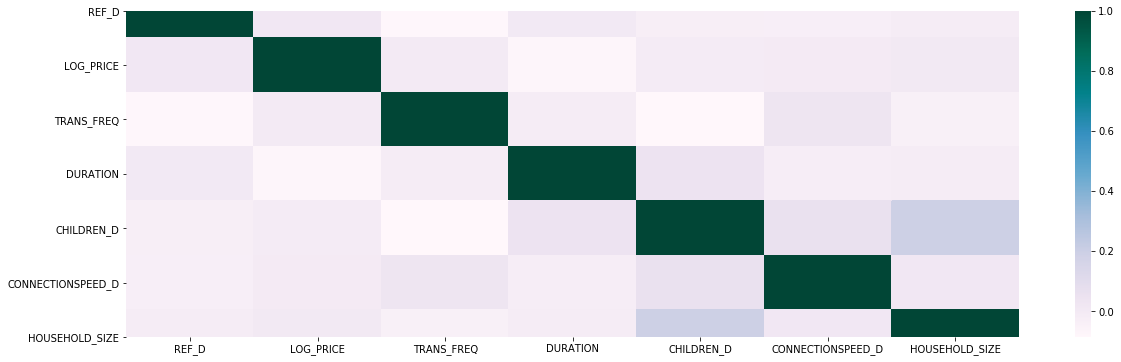

In [18]:
plt.figure(figsize =(20,6))
sns.heatmap(X,cmap="PuBuGn")

In [19]:
indepvar_log=sm.add_constant(hcsdata[['REF_D','LOG_PRICE','TRANS_FREQ','DURATION','HOUSEHOLD_SIZE', 'CHILDREN_D','CONNECTIONSPEED_D']])

C:\Users\chike\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [20]:
loregmod=sm.Logit(hcsdata.DIRECTP_D,indepvar_log)

In [21]:
loregmod_res=loregmod.fit()

Optimization terminated successfully.
         Current function value: 0.643629
         Iterations 6


In [22]:
print(loregmod_res.summary())

                           Logit Regression Results                           
Dep. Variable:              DIRECTP_D   No. Observations:                 3749
Model:                          Logit   Df Residuals:                     3741
Method:                           MLE   Df Model:                            7
Date:                Mon, 20 Apr 2020   Pseudo R-squ.:                 0.07052
Time:                        20:23:51   Log-Likelihood:                -2413.0
converged:                       True   LL-Null:                       -2596.0
Covariance Type:            nonrobust   LLR p-value:                 4.323e-75
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4457      0.407     -1.095      0.273      -1.243       0.352
REF_D                 0.7364      0.070     10.571      0.000       0.600       0.873
LOG_PRICE             0.

# 2. Please use the Count Data (Poisson) regression model to answer the question on “what are the factors that influence people’s booking frequencies?”  
- Please use TRANS_FREQ as your DV; and REF_D, LOG_PRICE, PAGES_VIEWED, HOUSEHOLD_SIZE, CHILDREN_D, and CONNECTIONSPEED_D as your IVs. 

# Descriptive Stats for Outcome variable in regards to the Poisson and NB2 Regression Models

In [23]:
hcsdata[["TRANS_FREQ"]].describe()

,TRANS_FREQ
count,3749.000000
mean,2.981328
std,4.120927
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,30.000000


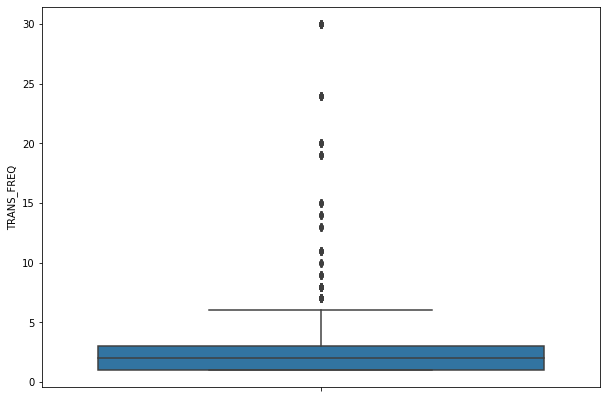

In [24]:
plt.figure(figsize=(10,7))
sns.boxplot(y="TRANS_FREQ",data=hcsdata)


# Please use the Count Data (Poisson) regression model to answer the question on “what are the factors that influence people’s booking frequencies

In [25]:
indepvar_poi=sm.add_constant(hcsdata[['REF_D','LOG_PRICE','PAGES_VIEWED','HOUSEHOLD_SIZE','CHILDREN_D','CONNECTIONSPEED_D']])

C:\Users\chike\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [26]:
poisson_mod=sm.Poisson(hcsdata.TRANS_FREQ,indepvar_poi)

In [27]:
poisson_res=poisson_mod.fit()

Optimization terminated successfully.
         Current function value: 2.808406
         Iterations 6


In [28]:
print(poisson_res.summary())

                          Poisson Regression Results                          
Dep. Variable:             TRANS_FREQ   No. Observations:                 3749
Model:                        Poisson   Df Residuals:                     3742
Method:                           MLE   Df Model:                            6
Date:                Mon, 20 Apr 2020   Pseudo R-squ.:                 0.01729
Time:                        20:23:52   Log-Likelihood:                -10529.
converged:                       True   LL-Null:                       -10714.
Covariance Type:            nonrobust   LLR p-value:                 5.967e-77
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4063      0.168      2.422      0.015       0.078       0.735
REF_D                -0.2274      0.019    -11.745      0.000      -0.265      -0.189
LOG_PRICE             0.

In [29]:
PoissSum=pd.DataFrame(poisson_res.params)
PoissSum["Exponential"]= np.exp(pd.to_numeric(PoissSum[0],downcast="float"))
PoissSum["Percentage"]= (PoissSum["Exponential"]-1)*100
PoissSum

,0,Exponential,Percentage
const,0.406327,1.501294,50.129379
REF_D,-0.227396,0.796606,-20.339436
LOG_PRICE,0.003339,1.003345,0.334501
PAGES_VIEWED,0.002267,1.002270,0.226951
HOUSEHOLD_SIZE,-0.011800,0.988270,-1.173031
CHILDREN_D,-0.232949,0.792194,-20.780600
CONNECTIONSPEED_D,0.900879,2.461766,146.176651


#  3) Please repeat the analysis in question 2. using the Negative Binomial Regression model. 

In [30]:
indepvar_NB=sm.add_constant(hcsdata[['REF_D','LOG_PRICE','PAGES_VIEWED','HOUSEHOLD_SIZE','CHILDREN_D','CONNECTIONSPEED_D']])

In [31]:
indepvar_NB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 7 columns):
const                3749 non-null float64
REF_D                3749 non-null float64
LOG_PRICE            3749 non-null float64
PAGES_VIEWED         3749 non-null int64
HOUSEHOLD_SIZE       3749 non-null int64
CHILDREN_D           3749 non-null int64
CONNECTIONSPEED_D    3749 non-null int64
dtypes: float64(3), int64(4)
memory usage: 205.1 KB


In [32]:
nbmod= sm.GLM(hcsdata.TRANS_FREQ, indepvar_NB,family=sm.families.NegativeBinomial())

In [33]:
nb_res=nbmod.fit()

In [34]:
print(nb_res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             TRANS_FREQ   No. Observations:                 3749
Model:                            GLM   Df Residuals:                     3742
Model Family:        NegativeBinomial   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8365.2
Date:                Mon, 20 Apr 2020   Deviance:                       2280.8
Time:                        20:23:53   Pearson chi2:                 5.24e+03
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3971      0.25

# Summary Stats for NB model

In [35]:
NBSummary=pd.DataFrame(nb_res.params)
NBSummary["Exponential"]= np.exp(pd.to_numeric(NBSummary[0],downcast="float"))
NBSummary["Percentage"]= (NBSummary["Exponential"]-1)*100
NBSummary

,0,Exponential,Percentage
const,0.397134,1.487555,48.755455
REF_D,-0.222856,0.800230,-19.976974
LOG_PRICE,0.000470,1.000470,0.046968
PAGES_VIEWED,0.002917,1.002922,0.292170
HOUSEHOLD_SIZE,-0.008476,0.991560,-0.843990
CHILDREN_D,-0.237622,0.788501,-21.149910
CONNECTIONSPEED_D,0.901019,2.462111,146.211121
